In [64]:
from sklearn.datasets import*
import matplotlib
import matplotlib.pyplot as plt
X,y = fetch_openml('mnist_784', version = 1, return_X_y=True)
X = X / 255
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [65]:
import numpy as np
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)
print(y.shape)
Y_new = np.eye(digits)[y.astype('int32')]

Y_new = Y_new.T.reshape(digits, examples)
print(Y_new)
print(Y_new.shape)

(1, 70000)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 70000)


In [66]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
shuffle_index = np.random.permutation(m)
print(shuffle_index)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
print(X_train.shape)
print(Y_train.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)
[50529     9  4182 ... 30216 52094 59716]
(784, 60000)
(10, 60000)


(784, 60000)


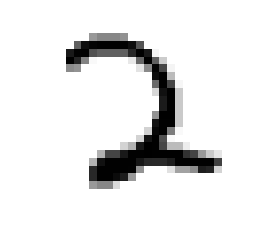

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
i = 12
import matplotlib.pyplot as plt
print(X_train.shape)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [68]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [69]:
import math

def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

n_x = X_train.shape[0]
n_h1 = 64
n_h2 = 64
learning_rate = 0.9

W1 = np.random.randn(n_h1, n_x)
b1 = np.zeros((n_h1, 1))
W2 = np.random.randn(n_h2, n_h1)
b2 = np.zeros((n_h2, 1))
W3 = np.random.randn(digits, n_h2)
b3 = np.zeros((digits, 1))

X = X_train
Y = Y_train
print(X.shape)
print(Y.shape)
print(W1.shape)
for i in range(100):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.matmul(W3,A2) + b3
    A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=0)

    cost = compute_multiclass_loss(Y, A3)

    dZ3 = A3-Y
    dW3 = (1./m) * np.matmul(dZ3, A2.T)
    db3 = (1./m) * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.matmul(W3.T, dZ3)
    dZ2 = dA2 * sigmoid(Z2) * (1 - sigmoid(Z2))
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    print("Epoch", i, "cost: ", cost)
print(dZ2.shape)
print(dW2.shape)
print(db2.shape)
print(dA1.shape)
print(dZ1.shape)
print(dW1.shape)
print(db1.shape)


print("Final cost:", cost)

(784, 60000)
(10, 60000)
(64, 784)
Epoch 0 cost:  7.981436511162305
Epoch 1 cost:  5.670801126113979
Epoch 2 cost:  4.163419544741337
Epoch 3 cost:  3.4796412636782588
Epoch 4 cost:  2.8487704423410416
Epoch 5 cost:  2.5847945818119054
Epoch 6 cost:  2.4429224422224824
Epoch 7 cost:  2.314334976136332
Epoch 8 cost:  2.2093168438756017
Epoch 9 cost:  2.1179240642958987
Epoch 10 cost:  2.0366976732161923
Epoch 11 cost:  1.9654968971433133
Epoch 12 cost:  1.9006592923446652
Epoch 13 cost:  1.842672469655808
Epoch 14 cost:  1.7894928648529564
Epoch 15 cost:  1.7411255813446642
Epoch 16 cost:  1.6964972836301404
Epoch 17 cost:  1.6554524882113593
Epoch 18 cost:  1.617275390745682
Epoch 19 cost:  1.5819217886577306
Epoch 20 cost:  1.5487501594703492
Epoch 21 cost:  1.517897543762684
Epoch 22 cost:  1.488719004833011
Epoch 23 cost:  1.4614896710408862
Epoch 24 cost:  1.435575618901585
Epoch 25 cost:  1.4113138988703982
Epoch 26 cost:  1.3881210978235512
Epoch 27 cost:  1.3663296060028651
Epoc

In [70]:
from sklearn.metrics import*
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)
Z3 = np.matmul(W3, A2) + b3
A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=0)

#print(A2)
#print(Y_test)
predictions = np.argmax(A3, axis=0)
labels = np.argmax(Y_test, axis=0)
print(predictions)
print(labels)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[7 6 1 ... 7 5 6]
[7 2 1 ... 4 5 6]
[[ 873    0   13   19    6   34   28    8   20   10]
 [   0 1074   20    9    6   12    6   27   21   10]
 [  19   15  769   68   25   20   64   33   43   12]
 [  14    9   66  739    7   90    8   10   82   13]
 [   5    1   17    3  704   44   22   25   39  125]
 [  41    8   17   81   10  519   23   13   62   28]
 [  18    1   53   10   39   26  787    4   37   10]
 [   4    4   23   21   14   37    1  796   35   91]
 [   4   21   44   44   15   73   14   26  550   33]
 [   2    2   10   16  156   37    5   86   85  677]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1011
           1       0.95      0.91      0.93      1185
           2       0.75      0.72      0.73      1068
           3       0.73      0.71      0.72      1038
           4       0.72      0.71      0.72       985
           5       0.58      0.65      0.61       802
           6       0.82      0.80      0.81       985
